In [1]:
import pandas as pd 
import seaborn as sns
%matplotlib inline
import numpy as np
pd.options.mode.chained_assignment = None

In [ ]:
cols = ['Which round did you get your coop in?', 'What is your salary (in CAD/h, do not include "$")?']
df = class_df[cols].rename(columns={'Which round did you get your coop in?': 'round',
                           'What is your salary (in CAD/h, do not include "$")?': 'salary'})

df.head(100)

In [ ]:
def remove_bad_salary(row):
    if row['salary'] > 40 or row['salary'] < 10 or row['round'] == 'Still Looking':
        return None
    
    return row

df = df.apply(remove_bad_salary, axis=1).dropna()
df.head(100)

In [5]:
print(len(df))
print(df['salary'].mean())

77
19.10961038961039


In [6]:
salary_by_round_mean = df.groupby('round').mean()
salary_by_round_mean

,salary
round,
1st Round,20.125625
2nd Round,19.040952
Continuous,18.389355
Direct Offer,19.944444


In [7]:
salary_by_round_median = df.groupby('round').median()
salary_by_round_median

,salary
round,
1st Round,19.50
2nd Round,19.00
Continuous,18.21
Direct Offer,20.00


In [8]:
salary_by_round_count = df.groupby('round').count()
salary_by_round_count

,salary
round,
1st Round,16
2nd Round,21
Continuous,31
Direct Offer,9


Text(0.5, 1.0, 'Coop Salary vs Round')

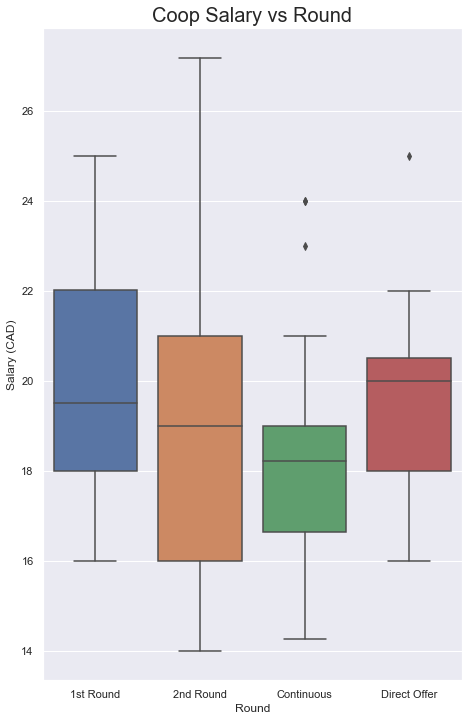

In [9]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (7.5, 12)})
ax = sns.boxplot(x='round', y='salary', data=df, order=['1st Round', '2nd Round', 'Continuous', 'Direct Offer'])
ax.set_xlabel('Round')
ax.set_ylabel('Salary (CAD)')
ax.set_title('Coop Salary vs Round', fontsize=20)

In [ ]:
salary_vs_round = df.reset_index()
salary_vs_round

In [13]:
ax.figure.savefig('graphs/coop_pay_v_round.png')